
Hierarchical clustering

In [4]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [6]:
# lectura de datos en Python y lo cargamos en la variable Datos

dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
##identificar registros y columnas
dataset.shape


(200, 5)

In [14]:
##eliminamos varriable 
data=dataset.drop(['Gender','CustomerID'], axis=1)

In [16]:
data.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [20]:
data.describe()


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [22]:
##cantidad de valores nulos
data.isna().sum()


Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
##Eliminar valores nulos si los hay
data.dropna()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


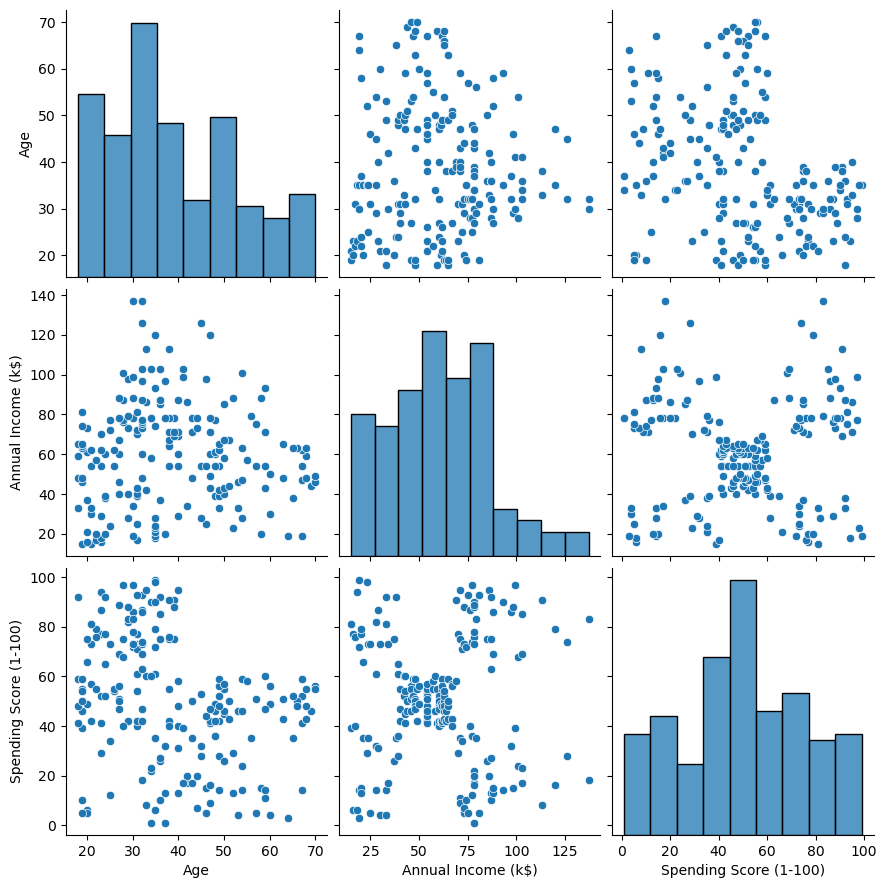

In [26]:
sns.pairplot(data.dropna(), size=3,kind='scatter')


In [28]:
# Matriz de correlación
corr_matrix = data.corr()
corr_matrix

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

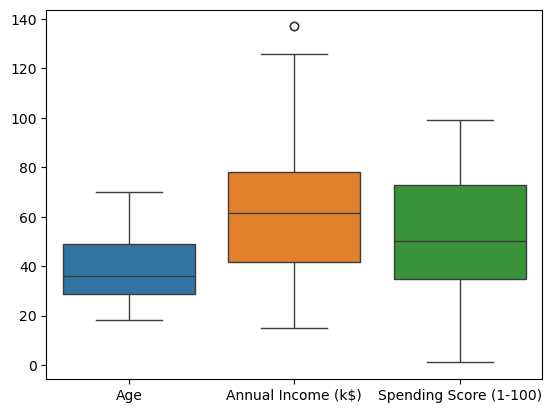

In [30]:
# Diagramas de caja para cada variable por especie
sns.boxplot(data=data)

In [34]:
# Estandarizar los datos antes de aplicar Hierarchical clustering
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


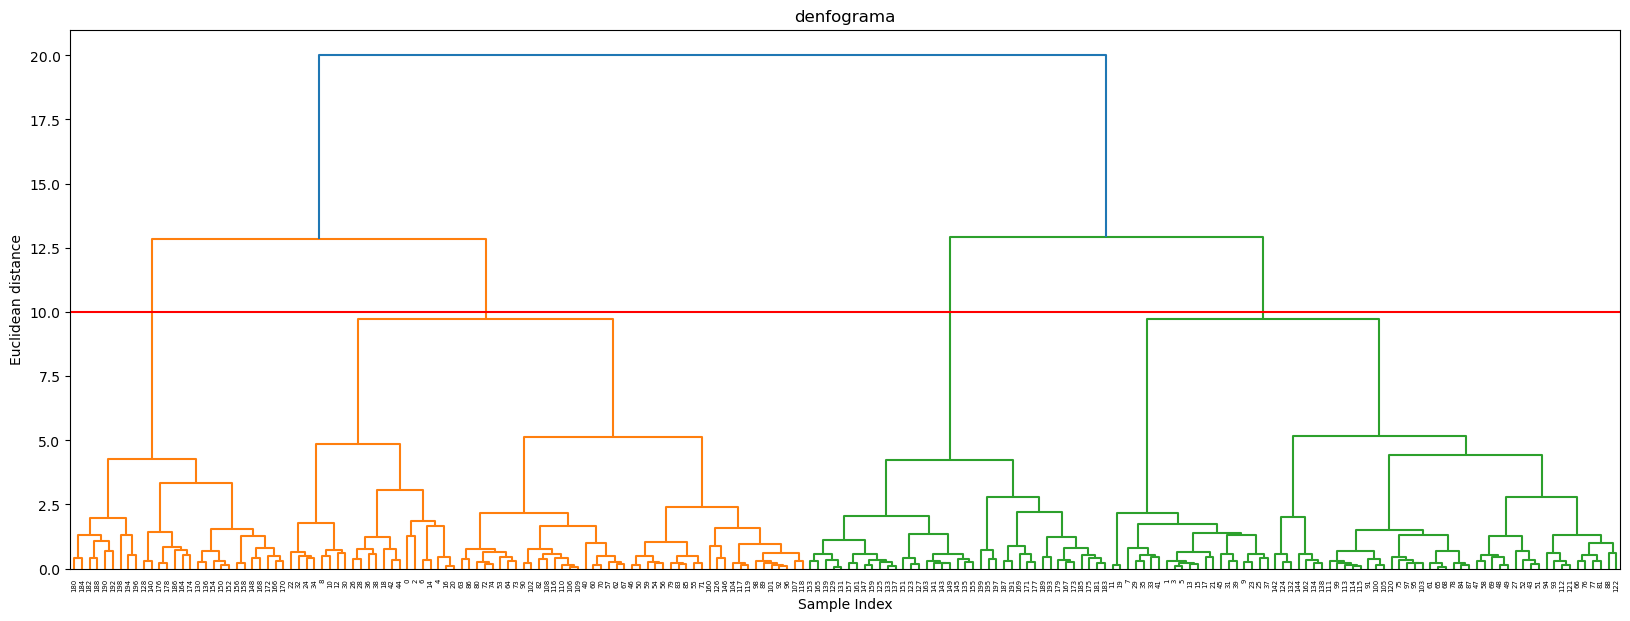

In [44]:
ward_clustering = linkage(X, method= "ward", metric = "euclidean")
plt.figure(figsize = (20,7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color= 'r', linestyle ='-')
plt.title('denfograma')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean distance')
plt.show()

In [56]:
hier_clustering = AgglomerativeClustering(n_clusters= 3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [66]:
# Obtenemos las etiquetas de cada punto de nuestroos datos

labels = labels_hier
colores = ('red','green','cyan')
asignar=[]
for row in labels:
    asignar.append(colores[row])

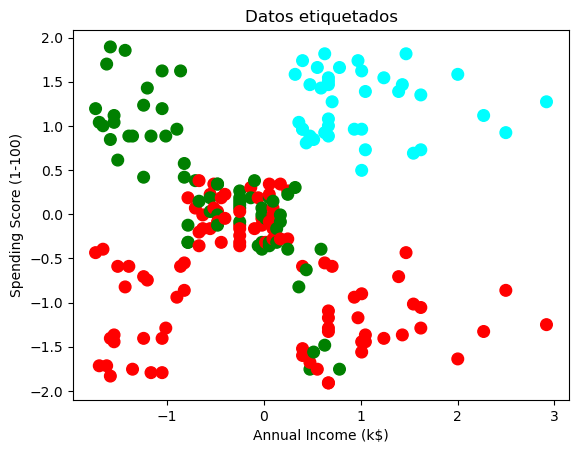

In [72]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1,f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

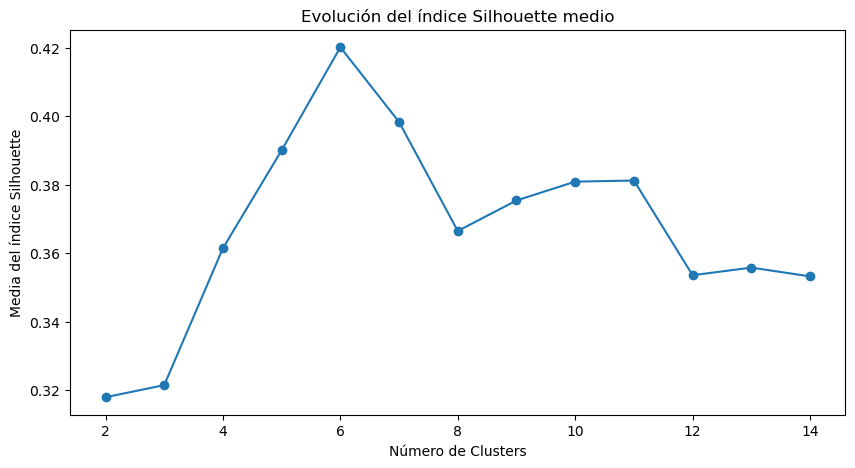

In [102]:
## metodo para identificaf el numero optimo de clusters

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
        metric='euclidean',
        linkage='ward',
        n_clusters=n_clusters
    )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución del índice Silhouette medio")
ax.set_xlabel("Número de Clusters")
ax.set_ylabel("Media del índice Silhouette")
plt.show()

In [110]:
##Calcular medidas de calidad para clustering Jerarquico

print("\nMedidas de calidad para Clustering Jerarquicos:")
print("Puntaje de siluetas:", metrics.silhouette_score(X, labels_hier))
print("Indice de Calinski-Marabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))



Medidas de calidad para Clustering Jerarquicos:
Puntaje de siluetas: 0.32148866683112387
Indice de Calinski-Marabasz: 88.10174149244529
Davies-Bouldin Index: 1.1277290061047862


In [118]:
hier_clustering = AgglomerativeClustering(n_clusters = 2)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int64)

In [120]:
##Calcular medidas de calidad para clustering Jerarquico

print("\nMedidas de calidad para Clustering Jerarquicos:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Indice de Calinski-Marabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))



Medidas de calidad para Clustering Jerarquicos:
Puntaje de silueta: 0.31795733680759597
Indice de Calinski-Marabasz: 99.00066801676013
Davies-Bouldin Index: 1.3082962894168522


In [124]:
## Calcular el coeficiente de correlacion cofenetica


from scipy.cluster.hierarchy import linkage

X_dist = pdist(X)

Z= linkage (X, 'ward')

coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlacion cofenetica", coef_cofenetico)

Coeficiente de correlacion cofenetica (0.6261774947075186, array([20.00004498,  1.28368768, 20.00004498, ..., 20.00004498,
        0.74145991, 20.00004498]))
